In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

In [56]:
# load data.xlsx

calibration_data = pd.read_excel('data.xlsx', sheet_name='calibration')
profile_data = pd.read_excel('data.xlsx', sheet_name='profile')

mmHg = 760

P_atm = mmHg * 9.80665 * 13545.848 / 1000
rho =  1.225
dyn_visc = 1.7894e-5

print(P_atm)

100957.93661979199


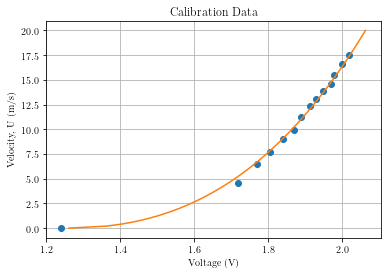

In [57]:

# plot calibration data

A	= 1.589867014
B	= 0.596894038

voltages = calibration_data['E (V)']
velocities = calibration_data['U (m/s)']

U = np.linspace(0, 20, 100)
E = np.sqrt(A + B * np.sqrt(U))

plt.plot(voltages, velocities, 'o')
plt.plot(E, U)
plt.xlabel('Voltage (V)')
plt.ylabel('Velocity, U (m/s)')
plt.grid()
plt.title('Calibration Data')

plt.savefig('calibration.png', dpi=600)
plt.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_996\1659825974.py:18: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.imshow(im,  aspect='equal', alpha=0.7)


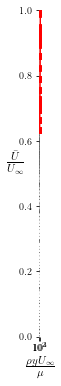

In [59]:

distances = profile_data["Dist (mm)"] * 1e-3
u_fluctuation = profile_data["u' (m/s)"]
u_mean = profile_data["u_bar (m/s)"]

dp = 100 * 0.68
U_inf = np.sqrt(2 * dp / rho)

clauser_x = rho * distances * U_inf / dyn_visc
clauser_y = u_mean / U_inf

fig = plt.figure(figsize=(9,6))
im = plt.imread('clauser_back.jpg')

# this axis is linear scale for image
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')

ax.imshow(im,  aspect='equal', alpha=0.7)
plt.axis('off')

# this axis is log scale
newax = fig.add_axes(ax.get_position(), frameon=False)
newax.set_ylim(0, 1)
newax.set_xlim(1e2, 1e5)
newax.set_xscale('log')

newax.plot(clauser_x, clauser_y, "-o", label="u_bar", color='r')

newax.set_xlabel(r'$\frac{\rho yU_\infty}{\mu}$', fontsize = 16)
newax.set_ylabel(r'$\frac{\bar{U}}{U_\infty}$', fontsize = 16).set_rotation(0)

fig.savefig('clauser_data.png', dpi=600)